In [1]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import legendary_ta as lta
import custom_indicator as cta

In [2]:
df = pd.read_pickle("./data/binance-BTCUSDT-1h.pkl")


In [3]:
df = df.loc['2023-01-01 02:00:00':'2023-01-15 02:00:00']

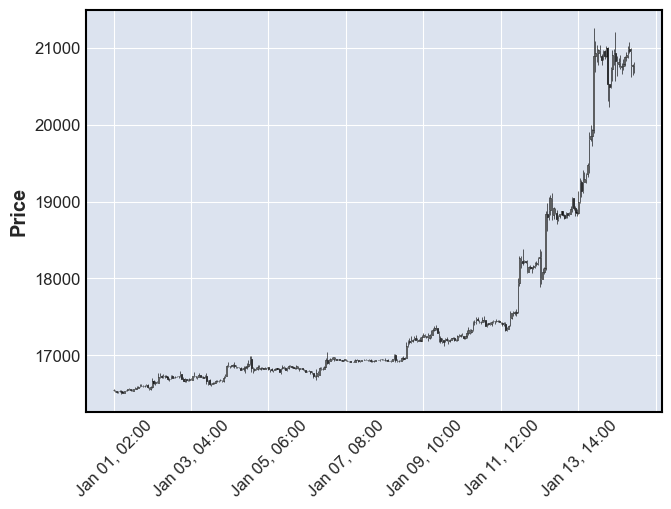

In [4]:
import mplfinance as mpf
mpf.plot(df, type='candle')

In [5]:
help(ta.xsignals)

Help on function xsignals in module pandas_ta.trend.xsignals:

xsignals(signal, xa, xb, above: bool = True, long: bool = True, asbool: bool = None, trend_reset: int = 0, trade_offset: int = None, offset: int = None, **kwargs)
    Cross Signals (XSIGNALS)
    
    Cross Signals returns Trend Signal (TSIGNALS) results for Signal Crossings. This
    is useful for indicators like RSI, ZSCORE, et al where one wants trade Entries
    and Exits (and Trends).
    
    Cross Signals has two kinds of modes: above and long.
    
    The first mode 'above', default True, xsignals determines if the signal first
    crosses above 'xa' and then below 'xb'. If 'above' is False, xsignals determines
    if the signal first crosses below 'xa' and then above 'xb'.
    
    The second mode 'long', default True, passes the long trend result into
    tsignals so it can determine the appropriate Entries and Exits. When 'long' is
    False, it does the same but for the short side.
    
    Example:
    # These

In [6]:
import pandas_ta as ta
from pandas_ta.statistics import zscore

In [17]:
windows_size = 50

CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 30,"prefix": "feature"},
        {"kind": "sma", "length": 50,"prefix": "feature"},
        {"kind": "sma", "length": 200, "prefix": "feature"},
        {"kind": "bbands", "length": 20, "prefix": "feature"},
        {"kind": "rsi", "prefix": "feature"},
        {"kind": "macd", "fast": 8, "slow": 21, "prefix": "feature"},
        {"kind": "sma", "close": "volume", "length": 20, "prefix": "feature_VOLUME"},
        {"kind": "mfi", "prefix": "feature"},
        {"kind": "tsi", "prefix": "feature"},
        {"kind": "uo", "prefix": "feature"},
        {"kind": "ao", "prefix": "feature"},
        {"kind": "vortex", "prefix": "feature"},
        {"kind": "trix", "prefix": "feature"},
        {"kind": "massi", "prefix": "feature"},
        {"kind": "cci", "prefix": "feature"},
        {"kind": "dpo", "prefix": "feature"},
        {"kind": "kst", "prefix": "feature"},
        {"kind": "aroon", "prefix": "feature"},
        {"kind": "kc", "prefix": "feature"},
        {"kind": "donchian", "prefix": "feature"},
        {"kind": "cmf", "prefix": "feature"},
        {"kind": "efi", "prefix": "feature"},
        {"kind": "pvt", "prefix": "feature"},
        {"kind": "nvi", "prefix": "feature"},
    ]
)

In [13]:
df = pd.read_csv("./data/BTC_USD-Hourly.csv", parse_dates=["date"], index_col="date")
df.sort_index(inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# df = pd.read_pickle("./data/binance-BTCUSDT-1h.pkl")
# df.sort_index(inplace=True)
# df.dropna(inplace=True)
# df.drop_duplicates(inplace=True)
# df["feature_close"] = df["close"].pct_change()
# df["feature_open"] = df["open"] / df["close"]
# df["feature_high"] = df["high"] / df["close"]
# df["feature_low"] = df["low"] / df["close"]
# df["feature_volume"] = df["volume"] / df["volume"].rolling(7 * 24).max()
# cta.NormalizedScore(df, 30*2)
# df = lta.smi_momentum(df)
# lta.pinbar(df, df["feature_smi"])
# df["feature_smi"] = df["feature_smi"] / 100

df.ta.cores = 0
df.ta.strategy(CustomStrategy)
df['feature_z_close'] = zscore(df['close'], length=windows_size )
df['feature_z_open'] = zscore(df['open'], length=windows_size )
df['feature_z_high'] = zscore(df['high'], length=windows_size )
df['feature_z_low'] = zscore(df['low'], length=windows_size )
df['feature_z_volume'] = zscore(df['volume'], length=windows_size )

df['feature_ori_close'] = df['close']
df['feature_ori_open'] = df['open']
df['feature_ori_high'] = df['high']
df['feature_ori_low'] = df['low']
df['feature_ori_volume'] = df['volume']

df.dropna(inplace=True)

In [11]:
df.tail()

,unix,symbol,open,high,low,close,volume,Volume USD,feature_SMA_30,feature_SMA_50,...,feature_z_close,feature_z_open,feature_z_high,feature_z_low,feature_z_volume,feature_ori_close,feature_ori_open,feature_ori_high,feature_ori_low,feature_ori_volume
date,,,,,,,,,,,,,,,,,,,,,
2022-02-28 20:00:00,1646078400,BTC/USD,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07,38846.874333,38910.8634,...,2.797276,2.537435,2.786950,2.694113,1.778239,41914.97,41361.99,41971.00,41284.11,247.151654
2022-02-28 21:00:00,1646082000,BTC/USD,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06,38922.928667,38958.2340,...,2.369816,2.792862,2.509066,2.691264,-0.205103,41659.53,41917.09,41917.09,41542.60,69.751680
2022-02-28 22:00:00,1646085600,BTC/USD,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07,39049.020667,39029.3308,...,3.062893,2.362801,3.830159,2.564019,3.976271,42907.32,41657.23,44256.08,41650.29,527.540571
2022-02-28 23:00:00,1646089200,BTC/USD,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06,39188.238667,39103.5836,...,2.927385,3.167024,2.826451,3.197960,0.076450,43178.98,43085.30,43364.81,42892.37,106.816103
2022-03-01 00:00:00,1646092800,BTC/USD,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06,39334.526667,39186.1694,...,2.729328,2.924805,2.720871,3.032239,-0.436833,43312.27,43221.71,43626.49,43185.48,52.056320


In [18]:
df.ta.cores = 0
df.ta.strategy(CustomStrategy)
df

,unix,symbol,open,high,low,close,volume,Volume USD,feature_SMA_30,feature_SMA_50,...,feature_KCBe_20_2,feature_KCUe_20_2,feature_DCL_20_20,feature_DCM_20_20,feature_DCU_20_20,feature_CMF_20,feature_EFI_13,feature_PVT,feature_NVI_1,feature_LOGRET_1
date,,,,,,,,,,,,,,,,,,,,,
2018-05-23 13:00:00,1527080400,BTC/USD,7911.83,7944.73,7883.00,7901.01,2.694516e+06,3.406200e+02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN
2018-05-23 14:00:00,1527084000,BTC/USD,7901.01,7916.48,7850.72,7887.00,3.849143e+06,4.886900e+02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.825266e+05,1000.000000,-0.001775
2018-05-23 15:00:00,1527087600,BTC/USD,7887.00,7906.00,7676.27,7710.02,8.694282e+06,1.120730e+03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.019202e+07,1000.000000,-0.022695
2018-05-23 16:00:00,1527091200,BTC/USD,7710.02,7719.37,7553.60,7625.38,1.484592e+07,1.946820e+03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.648976e+07,1000.000000,-0.011039
2018-05-23 17:00:00,1527094800,BTC/USD,7625.38,7637.06,7435.49,7516.28,1.361336e+07,1.809020e+03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.596705e+07,998.569252,-0.014411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28 20:00:00,1646078400,BTC/USD,41361.99,41971.00,41284.11,41914.97,2.471517e+02,1.035935e+07,38846.874333,38910.8634,...,39721.751443,41018.466829,37501.0,39736.00,41971.00,0.368633,83232.024999,-3.844669e+09,1497.008531,0.013268
2022-02-28 21:00:00,1646082000,BTC/USD,41917.09,41917.09,41542.60,41659.53,6.975168e+01,2.905822e+06,38922.928667,38958.2340,...,39906.301782,41150.851893,37501.0,39736.00,41971.00,0.357359,68796.397266,-3.844669e+09,1496.399107,-0.006113
2022-02-28 22:00:00,1646085600,BTC/USD,41657.23,44256.08,41650.29,42907.32,5.275406e+02,2.263535e+07,39049.020667,39029.3308,...,40192.113040,41814.475522,37501.0,40878.54,44256.08,0.297449,153005.461857,-3.844667e+09,1496.399107,0.029512
